## Census Income Dataset

## Problem Statement :
The dataset given below contains the census information about the attributes of individuals as the features and their income as the target. The task is to predict whether a person makes over $50K a year or not.

## About the dataset:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).  

The data has 1032 instances and 15 features. For your information the target variable `Income` has already been label encoded.
1 indicates the income is greater than or equal to 50K. 0 indicates the income is less than 50K. Below is a brief about the features in the dataset.

|Features|Description|
|-----|-----|
|age|Age of the person|
|Workclass|Categorical variable having 8 categories each denoting the type of employment|
|fnlwgt|final weight. |
|education|Categorical variable with 16 categories each denoting the qualification of the person.|
|education-num|number of years of education|
|marital-status|Categorical variable with 7 categories|
|occupation|Categorical variable with 14 categories each denoting the type of occupation of the individual|
|relationship|Categorical variable with 6 categories.|
|race|Categorical variable with 5 categories each denoting the ethnicity of the individual|
|sex|Gender of the person|
|capital-gain|Continuous| 
|capital-loss|Continuous|
|hours-per-week|Working hours per week|
|native-country|Categorical|
|Income|Target variable. 1 indicates >=50k. 0 indicates <50K|



### Reading the data using pandas module.

In [137]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix, precision_score,recall_score
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [138]:
dataframe = pd.read_csv('/Users/raisaurabh04/OneDrive/GreyAtom/Data Science/GitHub/GLabs_DSMP/03_Supervised_Machine_Learning/16_Logistic_Regression/Code Along/data/adult_preprocessed.csv',index_col=0)

In [139]:
dataframe.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Check for null values and get a summary of all the columns in the dataset

In [140]:
# Check for null values
dataframe.isna().any()

age               False
Workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
Income            False
dtype: bool

In [141]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 0 to 1119
Data columns (total 15 columns):
age               1032 non-null int64
Workclass         1032 non-null object
fnlwgt            1032 non-null int64
education         1032 non-null object
education-num     1032 non-null int64
marital-status    1032 non-null object
occupation        1032 non-null object
relationship      1032 non-null object
race              1032 non-null object
sex               1032 non-null object
capital-gain      1032 non-null int64
capital-loss      1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null object
Income            1032 non-null int64
dtypes: int64(7), object(8)
memory usage: 129.0+ KB


In [142]:
# Get a summary of the columns in the dataset
dataframe.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


### For further analysis split to bring all the continuous variables together and categorical variables together.

In [143]:
# Seperate continuous variables and categorical variables
dataframe_con = dataframe.select_dtypes(include = 'int64')
dataframe_cat = dataframe.select_dtypes(exclude = 'int64')

In [144]:
dataframe_con.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [145]:
dataframe_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


###  Plotting a stacked bar chart, have an estimate of the number of people with income above and below 50K with respect to each of the categorical features

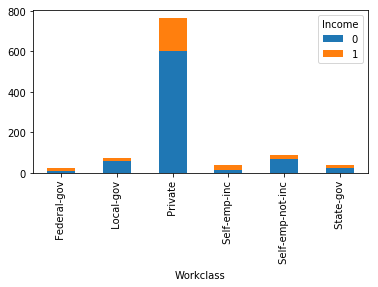

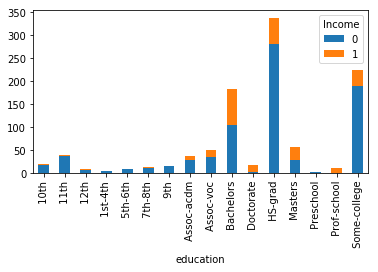

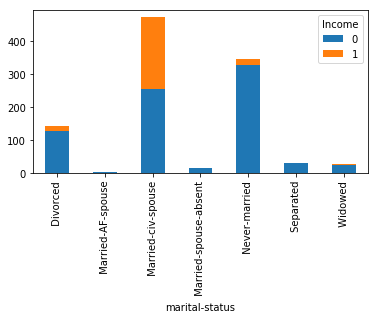

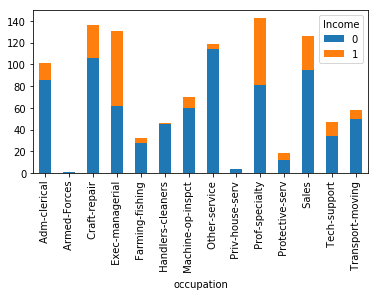

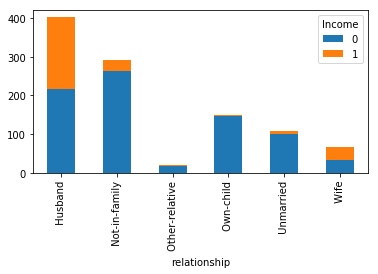

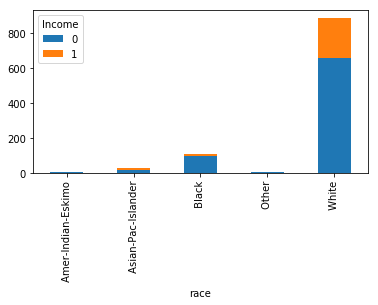

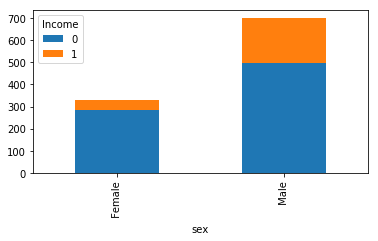

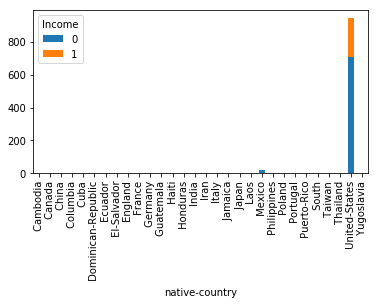

In [146]:
for cols in dataframe_cat :
    dataframe.groupby([cols, 'Income']).size().unstack().plot(kind = 'bar', figsize = (6,3), stacked = True)

### What can you infer from the above visualisations ?

### Plot a histogram for all the continuous variables to check for skewness

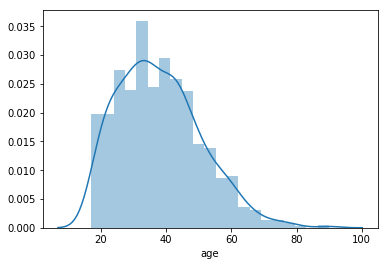

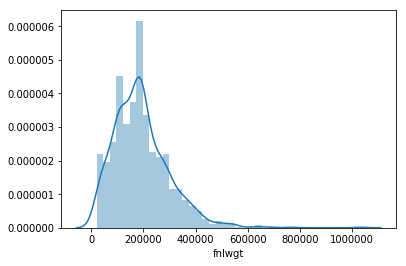

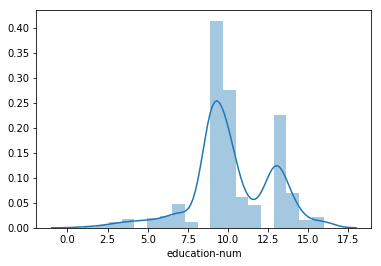

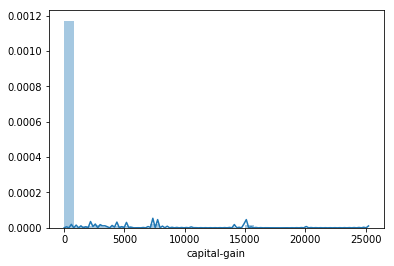

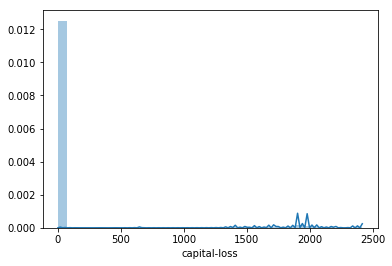

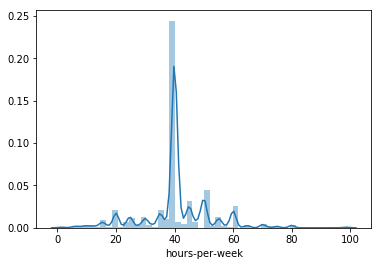

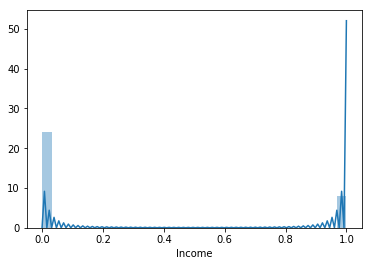

In [147]:
for cols in dataframe_con:
    sns.distplot(dataframe[cols])
    plt.show()

### Majority of values in capital-gain and capital-loss are zeros. So remove the columns

In [148]:
dataframe_con.drop(columns=['capital-gain', 'capital-loss'], inplace = True)

In [149]:
dataframe_con.head()

,age,fnlwgt,education-num,hours-per-week,Income
0,39,77516,13,40,0
1,50,83311,13,13,0
2,38,215646,9,40,0
3,53,234721,7,40,0
4,28,338409,13,40,0


### Check for skewness in the continuous data

In [150]:
df = pd.DataFrame({'columns' : dataframe_con.columns, 'skew' : skew(dataframe_con)} )

In [151]:
df

,columns,skew
0,age,0.616053
1,fnlwgt,1.393756
2,education-num,-0.302202
3,hours-per-week,0.163186
4,Income,1.178758


### The column `fnlwgt` is a highly right skewed column. Remove the skewness using a log transform and then check if the skewness has been removed by plotting its histogram

In [152]:
dataframe_con['fnlwgt'] = np.log1p(dataframe_con['fnlwgt'])

In [153]:
skew(dataframe_con)

array([ 0.61605344, -0.77599515, -0.30220179,  0.16318627,  1.17875794])

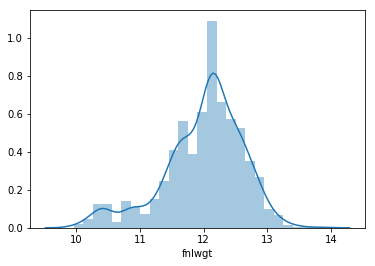

In [154]:
sns.distplot(dataframe_con['fnlwgt'])

In [155]:
#np.sqrt method is much harsher and should have been used

### Check for the pearson correlation between the continuous variables by plotting a heatmap

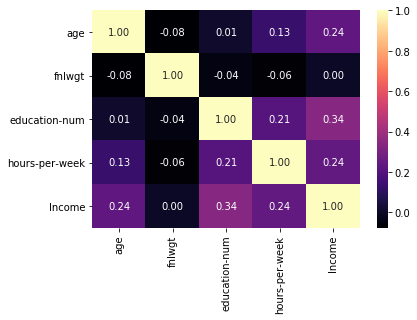

In [156]:
# Check for correlation between continuous variables
sns.heatmap(dataframe_con.corr(), annot=True, fmt = '.2f', cmap = 'magma')

In [157]:
# Not much correlation

### Label Encode all the categorical variables

In [158]:
# Label Encode Categorical variables
encoder = LabelEncoder()
for cols in dataframe_cat :
    dataframe_cat[cols] = encoder.fit_transform(dataframe_cat[cols])


In [159]:
dataframe_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


### Concatenate both the continuous and categorical dataframes

In [160]:
dataframe_new = pd.concat([dataframe_cat, dataframe_con], axis = 1)

In [161]:
dataframe_new.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,hours-per-week,Income
0,5,9,4,0,1,4,1,28,39,11.258253,13,40,0
1,4,9,2,3,0,4,1,28,50,11.330348,13,13,0
2,2,11,0,5,1,4,1,28,38,12.281398,9,40,0
3,2,1,2,5,0,2,1,28,53,12.366157,7,40,0
4,2,9,2,9,5,2,0,4,28,12.732013,13,40,0


### Split into features and target

In [162]:
X = dataframe_new.iloc[ : , : -1]
y = dataframe_new.iloc[ :, -1]

In [163]:
X.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,hours-per-week
0,5,9,4,0,1,4,1,28,39,11.258253,13,40
1,4,9,2,3,0,4,1,28,50,11.330348,13,13
2,2,11,0,5,1,4,1,28,38,12.281398,9,40
3,2,1,2,5,0,2,1,28,53,12.366157,7,40
4,2,9,2,9,5,2,0,4,28,12.732013,13,40


### Fit a StandardScaler on the features

In [164]:
stdscaler = StandardScaler()

In [165]:
# Fitting a Standard Scaler to increase the speed of training
for feature in X:
    X[feature] = stdscaler.fit_transform(X[[feature]])


In [166]:
X.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,hours-per-week
0,3.026993,-0.379789,0.935132,-1.570166,-0.294678,0.390011,0.687155,0.260938,0.081561,-1.172711,1.111052,-0.060217
1,1.941567,-0.379789,-0.402437,-0.819975,-0.902893,0.390011,0.687155,0.260938,0.939653,-1.057839,1.111052,-2.361827
2,-0.229286,0.167999,-1.740006,-0.319849,-0.294678,0.390011,0.687155,0.260938,0.003553,0.457498,-0.488677,-0.060217
3,-0.229286,-2.570939,-0.402437,-0.319849,-0.902893,-2.079263,0.687155,0.260938,1.173678,0.592547,-1.288541,-0.060217
4,-0.229286,-0.379789,-0.402437,0.680405,2.138182,-2.079263,-1.455275,-5.619778,-0.776531,1.175477,1.111052,-0.060217


### Convert array to a dataframe

### Split into train and validation data

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fit a logistic regression model

In [168]:
logreg = LogisticRegression()

In [169]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [170]:
y_pred = logreg.predict(X_test)

### Checking the accuracy, f1_score, confusion matrix

In [171]:
accuracy_score(y_test, y_pred)

0.8164251207729468

In [172]:
f1_score(y_test, y_pred)

0.45714285714285713

### Perform hyperparameter tuning using GridSearch

In [173]:
params = {'penalty' : ['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=logreg, param_grid=params, scoring='f1', cv = 10)
grid_search.fit(X_train, y_train)
y_pred_grid_search = grid_search.predict(X_test)

### Find the best parameters and the metrics after grid search

In [174]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [175]:
accuracy_score(y_test, y_pred_grid_search)

0.8019323671497585

In [177]:
f1_score(y_test, y_pred_grid_search), recall_score(y_test, y_pred_grid_search), precision_score(y_test, y_pred_grid_search)

(0.5060240963855422, 0.4883720930232558, 0.525)